In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.data_preprocess as preprocess
from utils.model_metrics import ModelMetric
from utils.mode_figure import ModelFigre
import datetime
from utils.model_callback import step_decay, exp_decay

In [2]:
modelmetric = ModelMetric()

In [3]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [4]:
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [5]:
import utils.network.network12 as model

In [6]:
net = model.MyLstmModel()

In [7]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, clipnorm=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=modelmetric.metric('binary_crossentropy')) # categorical_crossentropy

In [8]:
from tensorflow.keras import callbacks
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network-RMSprop")

logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(step_decay)
csv_log = tf.keras.callbacks.CSVLogger('../model_record/'+dir_name+"/log", separator=',', append=False)
if not os.path.isdir('../model_record/'+dir_name):
    os.mkdir('../model_record/'+dir_name)

In [9]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

663/663 [==============================] - 47s 70ms/step - loss: 0.1447 - tp: 320090.0000 - fp: 19334.0000 - tn: 320090.0000 - fn: 19334.0000 - acc: 0.0443 - precision: 0.9430 - recall: 0.9430 - auc: 0.9872 - binary_accuracy: 0.9430 - binary_crossentropy: 0.1447 - val_loss: 0.0820 - val_tp: 141249.0000 - val_fp: 4219.0000 - val_tn: 141249.0000 - val_fn: 4219.0000 - val_acc: 0.0000e+00 - val_precision: 0.9710 - val_recall: 0.9710 - val_auc: 0.9959 - val_binary_accuracy: 0.9710 - val_binary_crossentropy: 0.0820
Epoch 4/40
663/663 [==============================] - 46s 69ms/step - loss: 0.1423 - tp: 320433.0000 - fp: 18991.0000 - tn: 320433.0000 - fn: 18991.0000 - acc: 0.0454 - precision: 0.9440 - recall: 0.9440 - auc: 0.9878 - binary_accuracy: 0.9440 - binary_crossentropy: 0.1423 - val_loss: 0.0793 - val_tp: 141098.0000 - val_fp: 4370.0000 - val_tn: 141098.0000 - val_fn: 4370.0000 - val_acc: 0.1051 - val_precision: 0.9700 - val_recall: 0.9700 - val_auc: 0.9961 - val_binary_accuracy: 0.97

In [10]:
results  = net.evaluate(X_test, y_test, verbose=1)
modelmetric.getTrainMetricValue(net, results)

6495/6495 [==============================] - 191s 29ms/step - loss: 0.0865 - tp: 200381.0000 - fp: 7430.0000 - tn: 200381.0000 - fn: 7430.0000 - acc: 0.0000e+00 - precision: 0.9642 - recall: 0.9642 - auc: 0.9953 - binary_accuracy: 0.9642 - binary_crossentropy: 0.0865
loss :  0.086488276720047
tp :  200381.0
fp :  7430.0
tn :  200381.0
fn :  7430.0
acc :  0.0
precision :  0.9642463326454163
recall :  0.9642463326454163
auc :  0.9952765703201294
binary_accuracy :  0.9642463326454163
binary_crossentropy :  0.086488276720047


In [11]:
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
modelmetric.confusion_matrix(y_label, y_class)
modelmetric.eva_metric(y_label, y_class)

TrueNegatives result:  128246.0
TruePositives result:  72135.0
FalseNegatives result:  3439.0
FalsePositives result:  3991.0
Recall result:  0.95449495
Precision result:  0.9475738


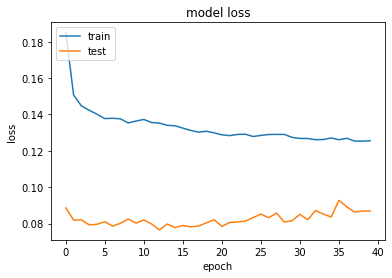

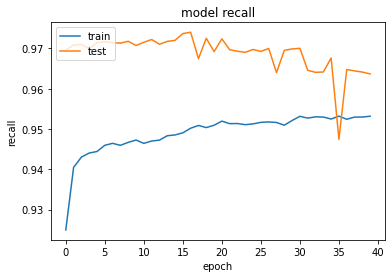

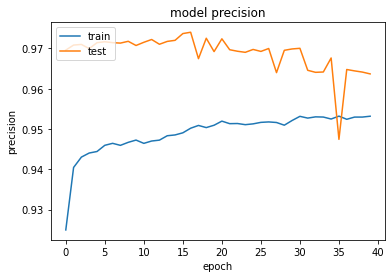

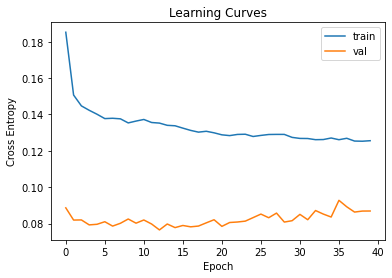

In [12]:
mf = ModelFigre("../model_record", dir_name, model_)
mf.loss_graph()
mf.recall_graph()
mf.precision_graph()
mf.cross_entropy_graph()
# fig.save_model(net,dir_name)

In [13]:
# mf.lr_graph(model_, dir_name)